In [1]:
import sys
import numpy as np
import pandas as pd
from scipy.stats import pearsonr as pr
from matplotlib import pyplot as plt
import matplotlib as mpl
import string

In [2]:
mpl.rcParams['font.size'] = 9

infile = '../Results/TS_Data_top10_three_labels.csv'
df = pd.read_csv(infile,index_col=0)

A MF_armax_3_1_05_1_minfpe
B MF_armax_2_2_05_1_p4_5
C MF_AR_arcov_5_a5
D MF_StateSpace_n4sid_3_05_1_p3_5
E MF_GARCHfit_ar_P1_Q2_stde_acmnd0
F MF_armax_3_1_05_1_p3_5
G MF_armax_3_1_05_1_p5_5
H MF_armax_2_2_05_1_p1_5
I MF_GARCHfit_ar_P1_Q2_stde_p4_5
J MF_FitSubsegments_arma_2_2_uniform_25_01_q_2_max


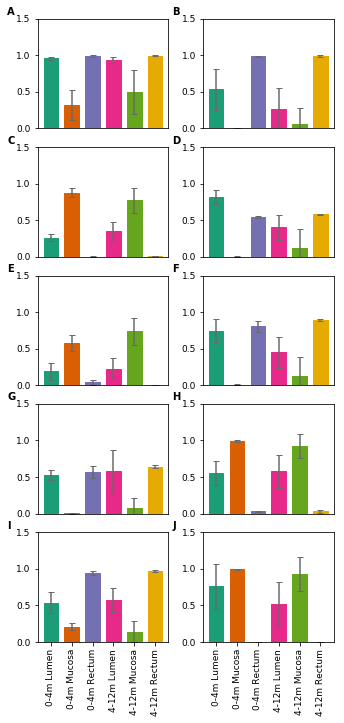

In [12]:
plt.figure(figsize=(4.72441,10))
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
for i in range(len(df.columns)):
    plt.subplot(5,2,i+1)
    data = dict()
    for j in range(len(df.index)):
        cont =  df.index[j].split('_')
        if cont[-2] == '4m': key = '0-4m '+cont[0]
        if cont[-2] == '12m': key = '4-12m '+cont[0]
        data[key] = data.get(key,[]) + [df.values[j,i]]
    keys = list(data.keys())
    keys.sort()

    means, stds = list(),list()
    for key in keys:
        means.append(np.mean(data[key]))
        stds.append(np.std(data[key]))

    ind = np.arange(len(means))
    plt.bar(ind,means,yerr=stds,align='center',color=colors,
                                ecolor='#696969',edgecolor=colors,
                                width=0.7, capsize=3)
    ticks = list()
    for item in keys: ticks.append(item.replace('_','m '))
    if i+1>8:
        plt.xticks(ind,ticks,rotation='vertical')
    else:plt.xticks([])
    #plt.title(df.columns[i])
    plt.ylim([0,1.5])
    plt.yticks([0,0.5,1.0,1.5])
    plt.text(-2.1, 1.55, string.ascii_uppercase[i],
            size=10, weight='bold')
    print(string.ascii_uppercase[i],df.columns[i])

# legend
#plt.subplot(5,2,11)
#plt.text(1,1,keys[0].replace('_',' '),bbox={'facecolor':colors[0], 'alpha':0.5, 'pad':2, 'edgecolor':'k'},fontsize=12)
plt.tight_layout()
plt.savefig('../Results/bar_chart_top10.pdf')
plt.show()